In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dimension = 2
sample_count = 100000

### Fitness Function

In [48]:
source = np.zeros(dimension)
target = np.ones(dimension) * 0.6

sigma_fitness = 1

def fitness(sample, point=target):

    difference = sample - point
    
    if isinstance(sample, list):
        norm = np.linalg.norm(difference)
    else:
        norm = np.linalg.norm(difference, axis=1)
    
    return np.e ** (-norm ** 2 / (2 * sigma_fitness**2) )

### Plotting Function

In [14]:
def plot_samples(samples):

    samples_plot = np.array(samples)
    
    f, axisArray = plt.subplots(1,dimension+1, sharey=True)
    f.set_figwidth(20)

    for d in range(dimension):
        axisArray[d].hist(samples_plot[:,d], 50)
        axisArray[d].set_xlim([-3,3])
        axisArray[d].set_title('mean = ' + str(np.mean(samples_plot[:,d])))
    
    axisArray[dimension].hist(fitness(samples_plot), 50, color='green')
    
    plt.show()

### Resampling

In [5]:
def resampling(samples, weights, sample_count):
    
    weights_normalized = weights / sum(weights)
    
    selected = np.random.choice(range(len(samples)), size=sample_count, p=weights_normalized, replace=True)
    
    return samples[selected,:]

### Kernels

In [6]:
def kernel_gaussian(samples, t):
     return proposal_gaussian(samples)

In [7]:
sigma_proposal = 0.1

def proposal_gaussian(samples):
    return samples + np.random.randn(sample_count, dimension) * sigma_proposal

In [50]:
def kernel_mcmc(samples, temperature, n=1):
    
    for i in range(n):
    
        candidates = proposal_gaussian(samples)
    
        alpha = acceptance(samples, candidates, temperature)
    
        selected = np.random.rand(samples.shape[0]) < alpha
    
        samples[selected,:] = candidates[selected,:]
    
    return samples

In [9]:
def acceptance(samples, candidates, temperature):
    
    return phi(candidates, temperature) / phi(samples, temperature)

# Sequential Monte Carlo Samplers

$$ \phi_t(x) \propto f(x)^{\eta(t)} g(x)^{1-\eta(t)}$$

In [36]:
temperatures = [0, 0.3, 0.5, 0.6, 0.8, 0.9, 1]

def eta(t):
    return temperatures[t]

def phi(samples, t):
    return (fitness(samples, target) ** eta(t)) * (fitness(samples, source) ** (1-eta(t)))

$$ x_{t-1} \sim \phi(x_{t-1})$$

$$ x_{t} \sim K_t(x_{t} | x_{t-1}) $$

$$ w_t(x_t) = \frac{\phi_t(x_t)}{\phi_{t-1}(x_t)} $$

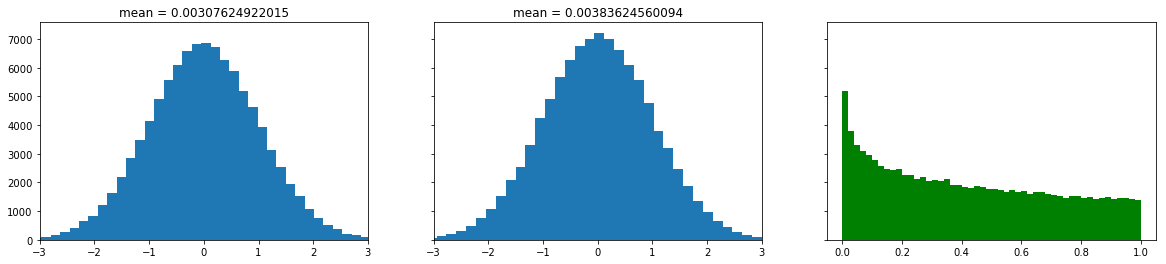

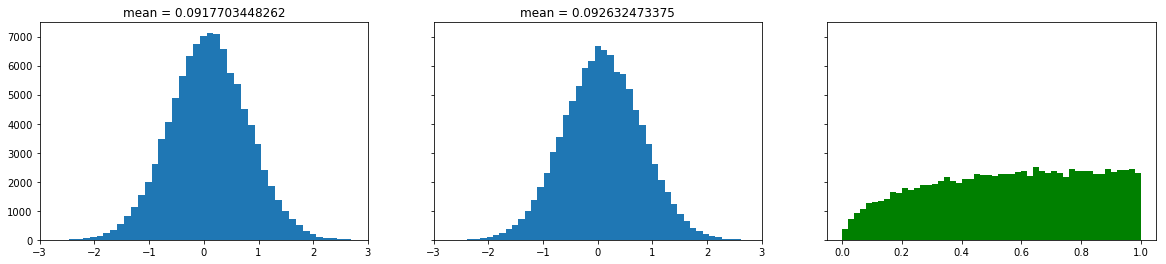

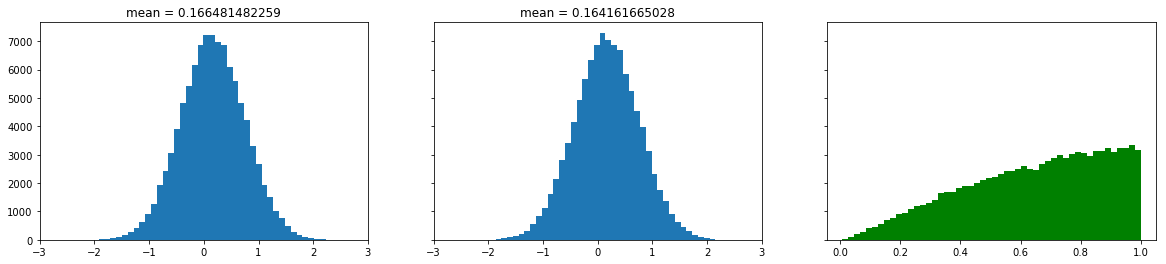

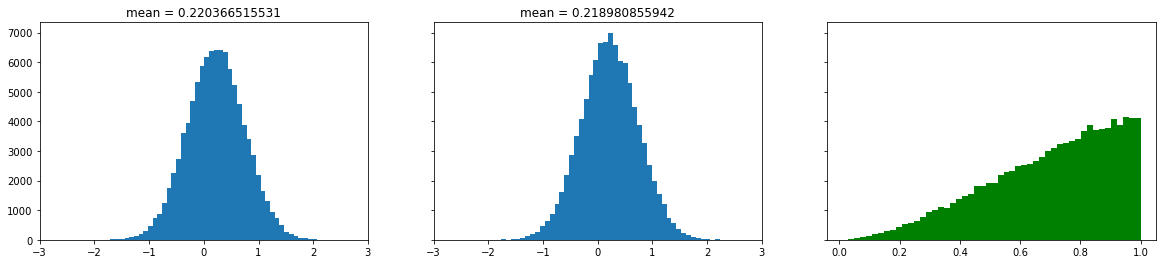

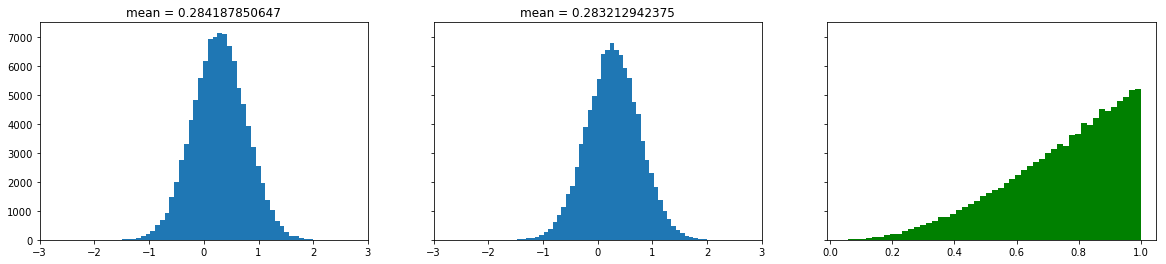

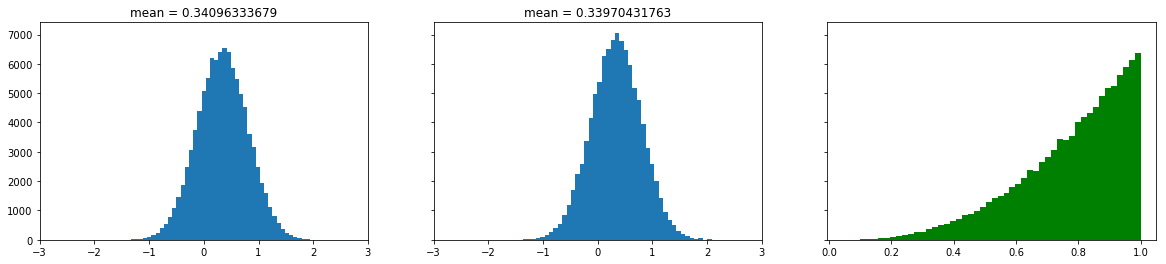

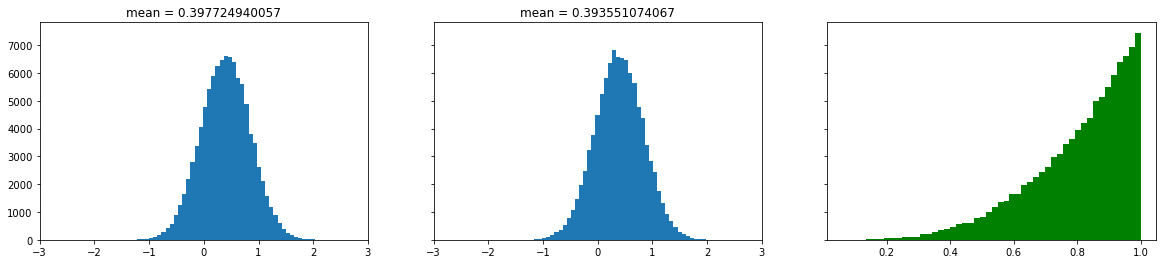

In [49]:
for temperature in range(len(temperatures)-1):
    
    if temperature == 0:
        samples = np.random.randn(sample_count, dimension)
        plot_samples(samples)
    else:
        # samples = kernel_gaussian(samples, temperature)
        samples = kernel_mcmc(samples, temperature, n=5)
            
    weights = phi(samples, temperature+1)
    samples = resampling(samples, weights, sample_count)
        
    plot_samples(samples)